In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#importing the urnings algortihm
import main_urnings as mu

## Urnings 2 autocorrelation with one student (pi = 0.5)

### Setting up the simulation

In [17]:
#game settings
n_player = 1
n_items = 10
starting_score = 50
player_urn_sizes = 100
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


### Setting up the game environment

In [130]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)


### Calculating autocorrelation for the student

In [131]:
acf = player.autocorrelation(lag = 20, plots=True)

print(acf)
print("The estimated value of the player is: ", player.est, "While the true value is: ", 0.5)

[1.         0.99271842 0.98534983 0.97774143 0.97027675 0.96283022
 0.95502964 0.94711259 0.93936425 0.93190796 0.92462946 0.91730557
 0.91002177 0.90295207 0.89595499 0.88942999 0.88314478 0.87670524
 0.87029294 0.86396611 0.85776638 0.8517482  0.84610224 0.84063407
 0.83509704 0.82928236 0.8235403  0.81788149 0.81214097 0.80655855
 0.80093074 0.7954898  0.7898166  0.78429396 0.77850806 0.77272746
 0.76693778 0.76115342 0.75528735 0.74946667 0.74346066]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
acf_so = player.so_autocorrelation(lag = 30, plots=True)

print(acf_so)

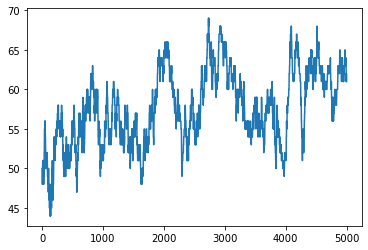

In [133]:
plt.plot(player.container)
plt.show()

In [ ]:
plt.plot(player.differential_container)

## Urnings 2 with multiple students

### Setting up the simulation

In [10]:
#game settings
n_player = 10
n_items = 20
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 10

#true scores for players and items
player_true_scores = np.append(np.array([0.5]), np.random.normal(0, 1, n_player - 1))
item_true_scores = np.random.uniform(0, 1, n_items)
player_true_scores = np.exp(player_true_scores) / (1 + np.exp(player_true_scores)) 

#creating players and items
players = []
items = []
for i in range(n_player):
    pname = "player" + str(i)
    
    player = mu.Player(user_id = pname, score = starting_score, urn_size = player_urn_sizes, true_value = player_true_scores[i])
    players.append(player)

for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = int(np.round(item_true_scores[i] * item_urn_sizes)), urn_size = item_urn_sizes, true_value = item_true_scores[i])
    items.append(item)


### Setting up game environment

In [11]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

[1.         0.93991349 0.8861262  0.83359875 0.7789828  0.73275455
 0.68694626 0.64449755 0.60457976 0.56886144 0.53819374 0.50752603
 0.48150023 0.45421459 0.43196832 0.41182178 0.38999546 0.37194866
 0.35936118 0.35265296 0.34594474 0.33293731 0.32036107 0.30776235
 0.29517486 0.28173625 0.2645181  0.25022835 0.23720968 0.21914039
 0.20821022]
The estimated value of the player is:  [0.4] While the true value is:  0.6224593312018546


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


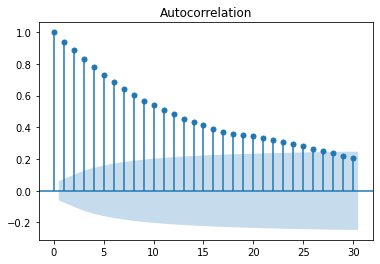

In [12]:
acf_2 = players[0].autocorrelation(lag = 30, plots=True)

print(acf_2)

print("The estimated value of the player is: ", players[0].est, "While the true value is: ", player_true_scores[0])


[ 1.00000000e+00 -5.33843700e-02 -1.06796016e-02  2.13489738e-02
 -7.47401678e-02 -3.56214946e-03 -2.84732695e-02 -1.42349466e-02
 -3.55873357e-02 -3.91460699e-02 -3.43475454e-06 -2.84698835e-02
  1.06727516e-02 -4.27082161e-02 -1.77971026e-02  1.42314729e-02
 -3.20320330e-02 -4.62669601e-02 -4.98256943e-02 -3.46402802e-06
  5.69396304e-02  3.56546712e-03 -1.06728622e-02  3.56546062e-03
 -7.80626034e-08  3.20284974e-02 -3.20320655e-02 -3.55881879e-03
  3.55838164e-02 -6.05019230e-02  3.20284811e-02]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


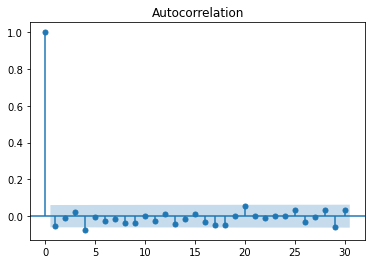

In [13]:
acf_2_so = players[0].so_autocorrelation(lag = 30, plots = True)

print(acf_2_so)


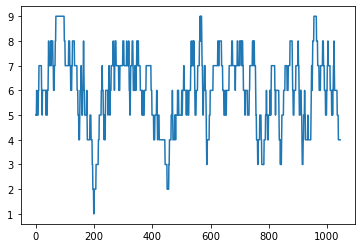

In [14]:
plt.plot(players[0].container)
plt.show()

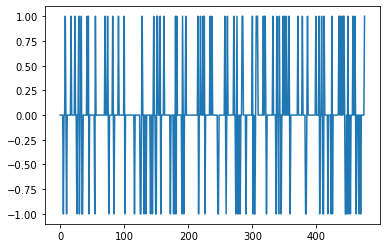

In [9]:
plt.plot(players[0].differential_container)
plt.show()